# Setup

Ensure MatplotLib plots figures inline and prepare a function to save the figures.

Python 3.5 or later must be installed as well as Scikit-Learn ≥0.20.

In [236]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
PROJECT_ID = "heart_disease"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", PROJECT_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#Get The Data

##Download The Data

In [237]:
# Import all libraries
import numpy as np
import pandas as pd
import urllib.request

# Import the dataset
HEART_DISEASES_URL = "https://raw.githubusercontent.com/nongvantinh/ml-projects/master/datasets/heart_disease/heart_disease_uci.csv"
urllib.request.urlretrieve(HEART_DISEASES_URL, "heart_disease_uci.csv")

('heart_disease_uci.csv', <http.client.HTTPMessage at 0x7fd65fb08c50>)

In [238]:
heart_disease = pd.read_csv("heart_disease_uci.csv")

##Take a Quick Look at the Data Structure

In [239]:
heart_disease.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


At the first glance `id` column doesn't make sense in heart disease detection system.

In [240]:
heart_disease = heart_disease.drop('id', axis=1)

In [241]:
heart_disease.isnull().values.any()

True

In [242]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


##Inspect category columns

In [243]:
heart_disease["sex"].value_counts()

Male      726
Female    194
Name: sex, dtype: int64

In [244]:
heart_disease["dataset"].value_counts()

Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: dataset, dtype: int64

In [245]:
heart_disease["cp"].value_counts()

asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: cp, dtype: int64

In [246]:
heart_disease["fbs"].value_counts()

False    692
True     138
Name: fbs, dtype: int64

In [247]:
heart_disease["restecg"].value_counts()

normal              551
lv hypertrophy      188
st-t abnormality    179
Name: restecg, dtype: int64

In [248]:
heart_disease["exang"].value_counts()

False    528
True     337
Name: exang, dtype: int64

In [249]:
heart_disease["slope"].value_counts()

flat           345
upsloping      203
downsloping     63
Name: slope, dtype: int64

In [250]:
heart_disease["thal"].value_counts()

normal               196
reversable defect    192
fixed defect          46
Name: thal, dtype: int64

In [251]:
heart_disease["num"].value_counts()

0    411
1    265
2    109
3    107
4     28
Name: num, dtype: int64

In [252]:
heart_disease.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


Saving figure attribute_histogram_plots


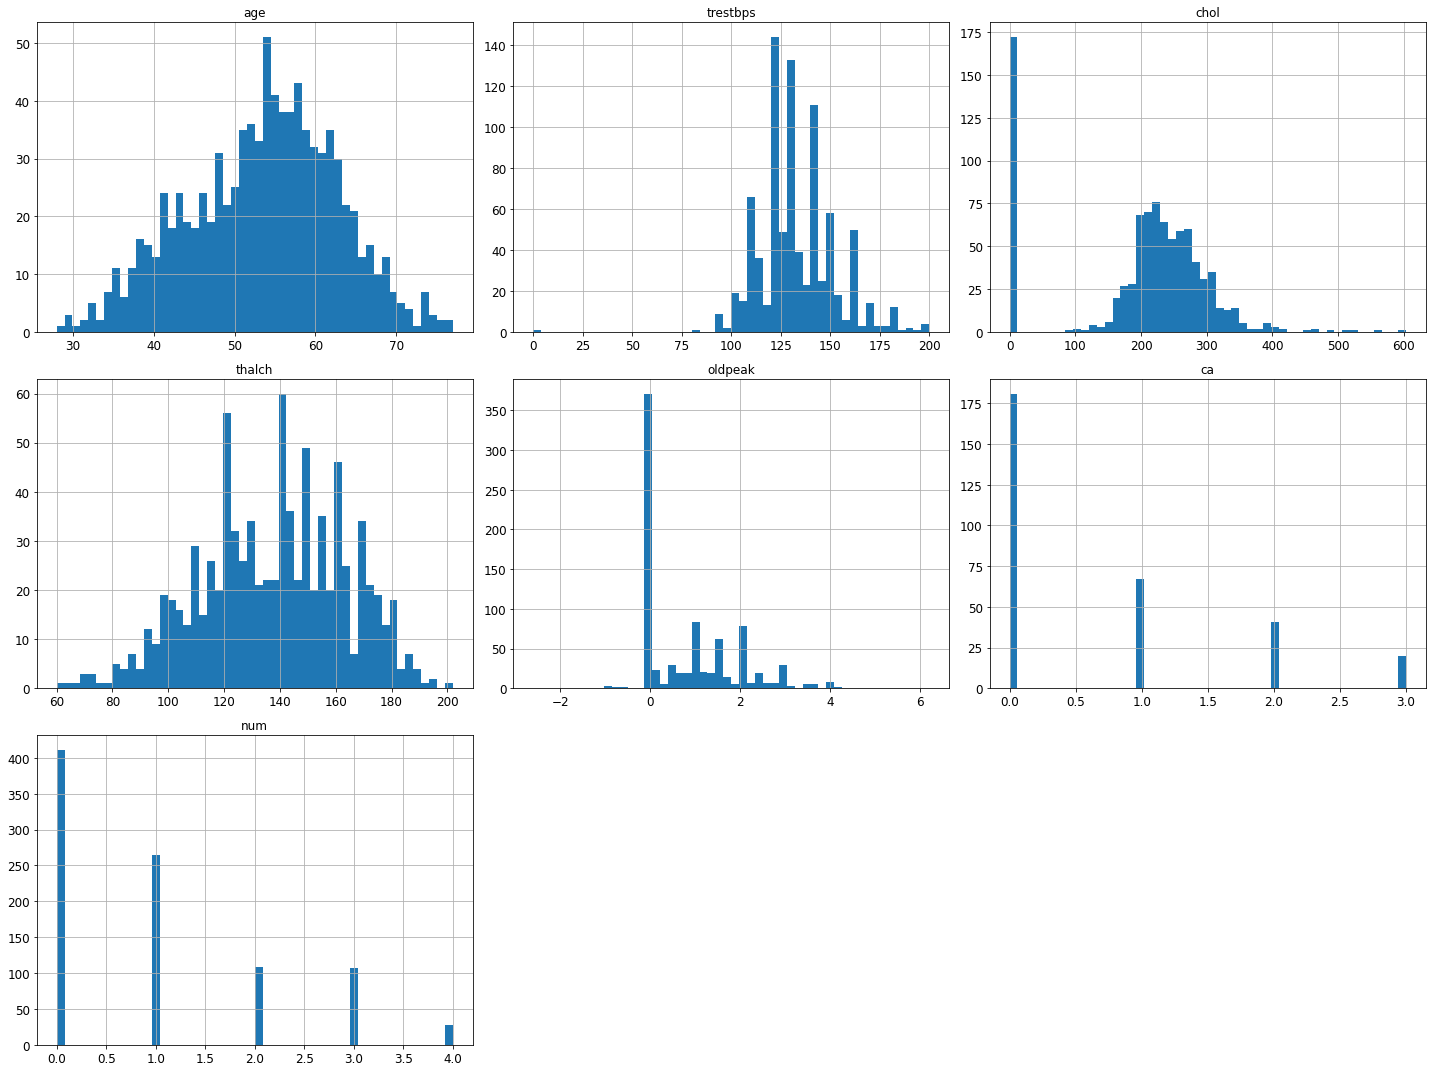

In [253]:
%matplotlib inline

import matplotlib.pyplot as plt
heart_disease.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

##Create A Test Set

In [254]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(heart_disease, test_size=0.2, random_state=42)

In [255]:
test_set.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
319,36,Male,Hungary,atypical angina,120.0,166.0,False,normal,180.0,False,0.0,NaN,NaN,NaN,0
377,45,Male,Hungary,atypical angina,140.0,224.0,True,normal,122.0,False,0.0,NaN,NaN,NaN,0
538,48,Male,Hungary,asymptomatic,160.0,329.0,False,normal,92.0,True,1.5,flat,NaN,NaN,1
296,59,Male,Cleveland,asymptomatic,164.0,176.0,True,lv hypertrophy,90.0,False,1.0,flat,2.0,fixed defect,3
531,40,Female,Hungary,asymptomatic,150.0,392.0,False,normal,130.0,False,2.0,flat,NaN,fixed defect,1


# Discover and Visualize the Data to Gain Insights

In [256]:
heart_disease = train_set.copy()

## Visualizing Geographical Data

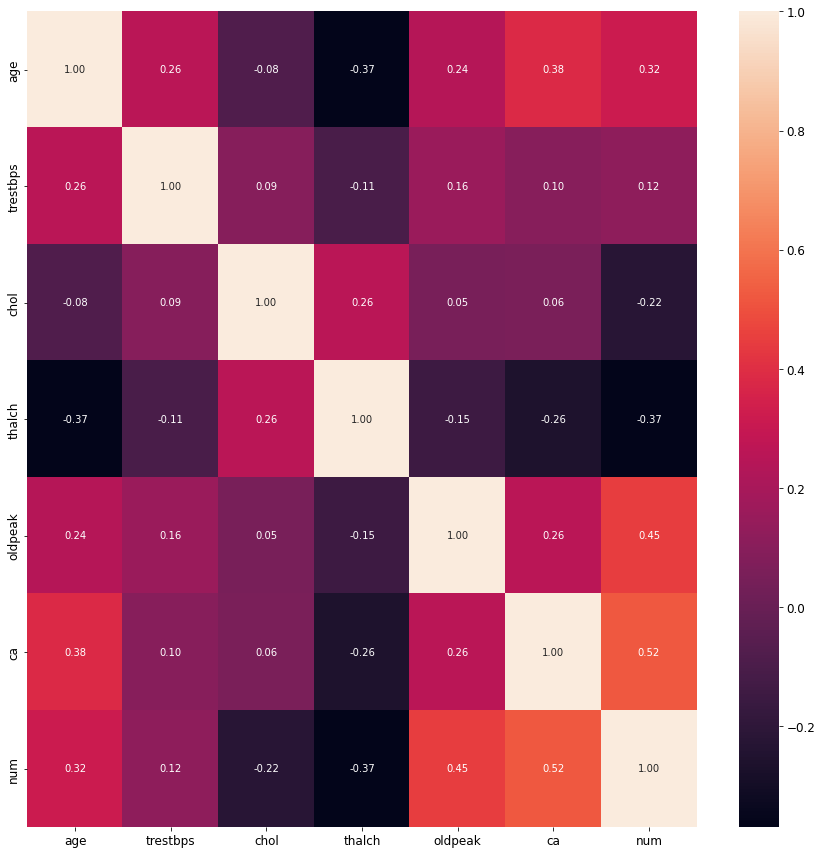

In [257]:
import seaborn
plt.figure(figsize=(15,15))
seaborn.heatmap(heart_disease.corr(),annot=True,fmt='.2f')
plt.show()

## Looking for Correlations

In [258]:
corr_matrix = heart_disease.corr()

In [259]:
corr_matrix["num"].sort_values(ascending=False)

num         1.000000
ca          0.522610
oldpeak     0.447453
age         0.319181
trestbps    0.121011
chol       -0.222180
thalch     -0.369152
Name: num, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd65eeaa410>,
      dtype=object)

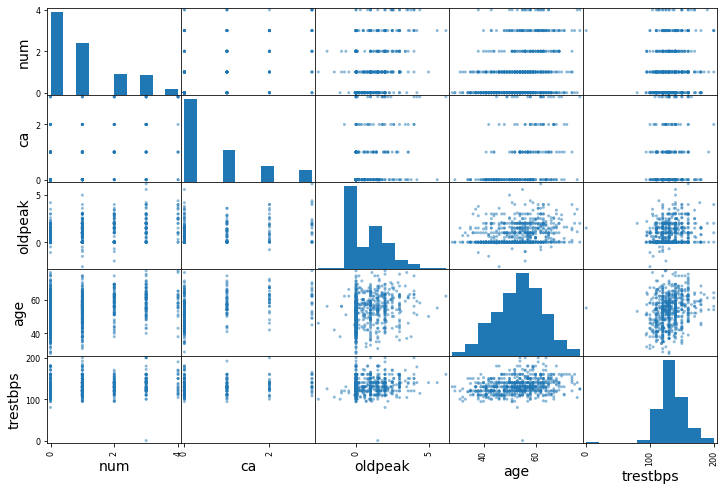

In [260]:
from pandas.plotting import scatter_matrix
attributes = ["num","ca","oldpeak", "age", "trestbps"]
scatter_matrix(heart_disease[attributes], figsize=(12, 8))


Saving figure age_versus_trestbps


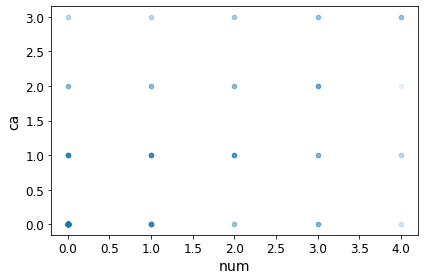

In [261]:
heart_disease.plot(kind="scatter", x="num", y="ca",alpha=0.1)
save_fig("age_versus_trestbps")

# Prepare the Data for Machine Learning Algorithms

In [262]:
heart_disease = train_set.drop(["num"],axis=1)
heart_disease_labels = train_set["num"].copy()

In [263]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 736 entries, 880 to 102
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       736 non-null    int64  
 1   sex       736 non-null    object 
 2   dataset   736 non-null    object 
 3   cp        736 non-null    object 
 4   trestbps  691 non-null    float64
 5   chol      711 non-null    float64
 6   fbs       656 non-null    object 
 7   restecg   735 non-null    object 
 8   thalch    694 non-null    float64
 9   exang     694 non-null    object 
 10  oldpeak   691 non-null    float64
 11  slope     498 non-null    object 
 12  ca        250 non-null    float64
 13  thal      346 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 86.2+ KB


## Custom Transformers

In [264]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

## Transformation Pipelines

In [265]:
heart_disease_num = heart_disease.select_dtypes(include=[np.number])
num_attribs = list(heart_disease_num)
cat_attribs = ["sex", "dataset", "cp", "fbs", "restecg", "exang", "slope", "thal"]

In [266]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [267]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder(sparse=False))
])

Old way, people use ColumnTransformer now.

In [268]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [269]:
heart_disease_prepared = full_pipeline.fit_transform(heart_disease)

In [270]:
heart_disease_prepared

array([[ 0.90241255, -0.08394637, -0.26228137, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.03477619,  0.98777137,  0.21481143, ...,  0.        ,
         0.        ,  1.        ],
       [-0.29058745, -0.08394637,  1.28827023, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 2.31232163,  1.52363024,  1.02219924, ...,  0.        ,
         1.        ,  0.        ],
       [-0.07367836,  0.4519125 ,  0.15976226, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.36013982, -0.19111814,  0.95797521, ...,  1.        ,
         0.        ,  0.        ]])

A new way to compose pipeline together.

In [271]:
from sklearn.compose import ColumnTransformer

# new_full_pipeline = ColumnTransformer([
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

new_heart_disease_prepared = full_pipeline.fit_transform(heart_disease)

The result is the same as with the `ColumnTransformer`:

In [272]:
np.allclose(heart_disease_prepared, new_heart_disease_prepared)

True

# Select and Train a Model

## Training and Evaluating on the Training Set

In [273]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(heart_disease_prepared, heart_disease_labels)

LinearRegression()

In [274]:
# let's try the full preprocessing pipeline on a few training instances
some_data = heart_disease.iloc[:5]
some_labels = heart_disease_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 2.51660156  0.22363281  1.07421875  0.36132812 -0.07910156]


Compare against the actual values:

In [275]:
print("Labels:", list(some_labels))

Labels: [4, 0, 3, 0, 0]


In [276]:
from sklearn.metrics import mean_squared_error

heart_disease_predictions = lin_reg.predict(heart_disease_prepared)
lin_mse = mean_squared_error(heart_disease_labels, heart_disease_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.7979821816912599

In [277]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(heart_disease_labels, heart_disease_predictions)
lin_mae

0.5898052713145381

In [278]:
# Select 3-Nearest Neighbors regression model
import sklearn.neighbors
kneighbors = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

kneighbors.fit(heart_disease_prepared, heart_disease_labels)

heart_disease_predictions = kneighbors.predict(heart_disease_prepared)

kneighbors_mse = mean_squared_error(heart_disease_labels, heart_disease_predictions)
kneighbors_rmse = np.sqrt(kneighbors_mse)
kneighbors_rmse

0.6353609799784898

In [279]:
# Support Vector Classification model
from sklearn.svm import SVC

svc_reg = SVC(kernel="poly")
svc_reg.fit(heart_disease_prepared, heart_disease_labels)
heart_disease_predictions = svc_reg.predict(heart_disease_prepared)
svc_mse = mean_squared_error(heart_disease_labels, heart_disease_predictions)
svc_rmse = np.sqrt(svc_mse)
svc_rmse

0.7545153929913355

In [280]:
#Support Vector Regression
from sklearn.svm import SVR

svr_reg = SVR(kernel="linear")
svr_reg.fit(heart_disease_prepared, heart_disease_labels)
heart_disease_predictions = svr_reg.predict(heart_disease_prepared)
svr_mse = mean_squared_error(heart_disease_labels, heart_disease_predictions)
svr_rmse = np.sqrt(svr_mse)
svr_rmse

0.8136628079001442

In [281]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(heart_disease_prepared, heart_disease_labels)

heart_disease_predictions = forest_reg.predict(heart_disease_prepared)
forest_mse = mean_squared_error(heart_disease_labels, heart_disease_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.3192226887299836

In [282]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(heart_disease_prepared, heart_disease_labels)

DecisionTreeRegressor(random_state=42)

In [283]:
heart_disease_predictions = tree_reg.predict(heart_disease_prepared)
tree_mse = mean_squared_error(heart_disease_labels, heart_disease_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Better Evaluation Using Cross-Validation

In [284]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, heart_disease_prepared, heart_disease_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [285]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [1.15079291 1.3151919  1.21921552 1.08428579 1.13304183 1.02667135
 1.30855981 1.3447004  1.08539495 0.98620624]
Mean: 1.1654060689999162
Standard deviation: 0.11982231601334083


In [286]:
lin_scores = cross_val_score(lin_reg, heart_disease_prepared, heart_disease_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [8.93619687e-01 8.02441877e-01 8.49564261e-01 8.04617411e-01
 7.77988019e-01 8.77762106e-01 2.13080027e+10 8.96460020e-01
 8.52543504e-01 7.21773419e-01]
Mean: 2130800267.644196
Standard deviation: 6392400800.4403305


In [287]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, heart_disease_prepared, heart_disease_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.91665741 0.81467287 0.90559746 0.80819703 0.82718098 0.896998
 0.80214439 1.01014308 0.86754101 0.80831467]
Mean: 0.8657446889478762
Standard deviation: 0.06384486572573679


In [288]:
scores = cross_val_score(lin_reg, heart_disease_prepared, heart_disease_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    1.000000e+01
mean     2.130800e+09
std      6.738182e+09
min      7.217734e-01
25%      8.029858e-01
50%      8.510539e-01
75%      8.896553e-01
max      2.130800e+10
dtype: float64

# Fine-Tune The Model

## Grid Search

In [289]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(heart_disease_prepared, heart_disease_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

The best hyperparameter combination found:

In [290]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [291]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [292]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1.0159330071304002 {'max_features': 2, 'n_estimators': 3}
0.9050205719789428 {'max_features': 2, 'n_estimators': 10}
0.8715464506637867 {'max_features': 2, 'n_estimators': 30}
1.00986027595932 {'max_features': 4, 'n_estimators': 3}
0.9000656244588026 {'max_features': 4, 'n_estimators': 10}
0.8599616705942293 {'max_features': 4, 'n_estimators': 30}
1.001309126546683 {'max_features': 6, 'n_estimators': 3}
0.8960327567850653 {'max_features': 6, 'n_estimators': 10}
0.868015071557035 {'max_features': 6, 'n_estimators': 30}
0.9639982146580908 {'max_features': 8, 'n_estimators': 3}
0.8863617013595892 {'max_features': 8, 'n_estimators': 10}
0.8524382124283547 {'max_features': 8, 'n_estimators': 30}
1.0012586306124849 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.9074375021848016 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.9661821762968473 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.8734113043063753 {'bootstrap': False, 'max_features': 3, 'n_est

In [293]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012310,0.002290,0.001941,0.000155,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-1.058559,-0.972789,...,-1.032120,0.050490,18,-0.205404,-0.272024,-0.273911,-0.282777,-0.242784,-0.255380,0.028380
1,0.021608,0.004458,0.002500,0.000319,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-0.789257,-0.731701,...,-0.819062,0.062047,10,-0.127568,-0.137997,-0.142886,-0.137250,-0.136282,-0.136396,0.004967
2,0.047362,0.001245,0.004661,0.000294,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-0.741209,-0.680076,...,-0.759593,0.066645,4,-0.110949,-0.106680,-0.111522,-0.106531,-0.106601,-0.108456,0.002277
3,0.007389,0.000611,0.001417,0.000030,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-0.989489,-0.868481,...,-1.019818,0.127112,17,-0.230537,-0.272590,-0.279759,-0.261460,-0.221468,-0.253163,0.023109
4,0.018117,0.000266,0.002183,0.000066,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-0.763176,-0.711769,...,-0.810118,0.101317,9,-0.131514,-0.146316,-0.153294,-0.134516,-0.146214,-0.142371,0.008114
5,0.055083,0.003161,0.005119,0.001328,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-0.718011,-0.635865,...,-0.739534,0.077531,2,-0.107058,-0.109349,-0.113313,-0.106870,-0.110251,-0.109368,0.002363
6,0.009318,0.004156,0.001714,0.000237,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-0.963213,-0.891912,...,-1.002620,0.097729,16,-0.243764,-0.270326,-0.215431,-0.248632,-0.237880,-0.243207,0.017692
7,0.026083,0.005364,0.002479,0.000420,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-0.777095,-0.709456,...,-0.802875,0.086143,8,-0.136105,-0.138998,-0.144075,-0.135059,-0.147674,-0.140382,0.004803
8,0.059062,0.002760,0.005237,0.001710,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-0.741907,-0.680491,...,-0.753450,0.060063,3,-0.111056,-0.109098,-0.106684,-0.103230,-0.107931,-0.107600,0.002617
9,0.007887,0.000372,0.001435,0.000064,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-0.858859,-0.816327,...,-0.929293,0.082429,13,-0.247732,-0.257687,-0.267119,-0.261460,-0.267685,-0.260337,0.007310


## Randomized Search

In [294]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(heart_disease_prepared, heart_disease_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd65e710f10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd65e7100d0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [295]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.8462488577201654 {'max_features': 7, 'n_estimators': 180}
0.8693658967135132 {'max_features': 5, 'n_estimators': 15}
0.848343809075976 {'max_features': 3, 'n_estimators': 72}
0.8622683149723115 {'max_features': 5, 'n_estimators': 21}
0.8465776877655381 {'max_features': 7, 'n_estimators': 122}
0.8491683323420457 {'max_features': 3, 'n_estimators': 75}
0.8474820268413542 {'max_features': 3, 'n_estimators': 88}
0.8477532623701104 {'max_features': 5, 'n_estimators': 100}
0.8415898465382807 {'max_features': 3, 'n_estimators': 150}
1.054684696384839 {'max_features': 5, 'n_estimators': 2}


## Analyze the Best Models and Their Errors

In [296]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.09815576, 0.06550009, 0.08618103, 0.09850533, 0.12973639,
       0.0330911 , 0.00912868, 0.01477038, 0.01221958, 0.05274428,
       0.02442106, 0.0181098 , 0.06540262, 0.0192137 , 0.00956275,
       0.00666834, 0.01319529, 0.01051328, 0.00607543, 0.01014623,
       0.01483081, 0.00932867, 0.00039714, 0.05282594, 0.01631713,
       0.00403817, 0.01045326, 0.02297828, 0.01043769, 0.00795581,
       0.00714003, 0.02095394, 0.02845905, 0.010543  ])

In [297]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.12973638617135766, 'oldpeak'),
 (0.09850532642982263, 'thalch'),
 (0.09815575838380777, 'age'),
 (0.08618102650058201, 'chol'),
 (0.06550008619435545, 'trestbps'),
 (0.03309110277059811, 'ca'),
 (0.01477037795531824, 'Male'),
 (0.009128675835785601, 'Female')]

## Evaluate The System on the Test Set

In [298]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("num", axis=1)
y_test = test_set["num"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [299]:
final_rmse

0.805806224533904

We can compute a 95% confidence interval for the test RMSE:

In [300]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([0.70183473, 0.897817  ])

Or compute the interval manually like this:

In [301]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(0.7018347258461115, 0.8978169972726527)

Alternatively, we could use a z-scores rather than t-scores:

In [302]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(0.7025728526814259, 0.8972395051881368)